### libraries

In [18]:
library(dplyr)
library(ggplot2)
theme_set(theme_bw(base_size = 16))
library(readr)
library(tree)
library(MASS)
library(party)
library(rpart)

### load data

Training:

In [2]:
df_train <- read.csv('DT_train.csv', header=TRUE)
df_train <- df_train[2:9]
head(df_train)

,artistPop,trackPop,trackDurMS,trackKey,trackMode,albumYear,pref_dist,Preferred
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,31,4,253266,3,1,2002,0.6511696,0
2,81,34,185120,8,1,2010,0.9754167,0
3,52,36,156893,7,1,1959,0.9645495,1
4,76,62,204200,4,1,2009,0.9728150,1
5,69,32,323653,0,1,2010,0.9283338,0
6,66,75,232533,2,1,2005,0.7483127,1


In [3]:
df_train$Preferred <- factor(df_train$Preferred)
df_train$trackKey <- factor(df_train$trackKey)
df_train$trackMode <- factor(df_train$trackMode)

head(df_train)

,artistPop,trackPop,trackDurMS,trackKey,trackMode,albumYear,pref_dist,Preferred
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<fct>
1,31,4,253266,3,1,2002,0.6511696,0
2,81,34,185120,8,1,2010,0.9754167,0
3,52,36,156893,7,1,1959,0.9645495,1
4,76,62,204200,4,1,2009,0.9728150,1
5,69,32,323653,0,1,2010,0.9283338,0
6,66,75,232533,2,1,2005,0.7483127,1


In [4]:
str(df_train)

'data.frame':	386389 obs. of  8 variables:
 $ artistPop : int  31 81 52 76 69 66 49 67 59 78 ...
 $ trackPop  : int  4 34 36 62 32 75 23 9 26 40 ...
 $ trackDurMS: int  253266 185120 156893 204200 323653 232533 172360 176493 346386 251146 ...
 $ trackKey  : Factor w/ 12 levels "0","1","2","3",..: 4 9 8 5 1 3 3 3 9 1 ...
 $ trackMode : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 1 ...
 $ albumYear : int  2002 2010 1959 2009 2010 2005 2002 2006 2004 2001 ...
 $ pref_dist : num  0.651 0.975 0.965 0.973 0.928 ...
 $ Preferred : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 1 ...


Testing:

In [5]:
df_test <- read.csv('DT_test.csv', header=TRUE)
df_test <- df_test[2:9]
df_test$Preferred <- factor(df_test$Preferred)
df_test$trackKey <- factor(df_test$trackKey)
df_test$trackMode <- factor(df_test$trackMode)
head(df_test)

,artistPop,trackPop,trackDurMS,trackKey,trackMode,albumYear,pref_dist,Preferred
,<int>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<fct>
1,71,58,231706,11,1,2009,0.9634307,1
2,14,0,247013,10,0,2002,0.8522943,0
3,63,27,196600,7,1,2008,0.8441460,0
4,77,50,322040,5,1,2008,0.8918724,1
5,63,26,204426,1,1,2003,0.9776432,1
6,59,31,230586,0,1,2004,0.7287504,1


In [6]:
str(df_test)

'data.frame':	96597 obs. of  8 variables:
 $ artistPop : int  71 14 63 77 63 59 59 42 56 57 ...
 $ trackPop  : int  58 0 27 50 26 31 24 9 44 13 ...
 $ trackDurMS: int  231706 247013 196600 322040 204426 230586 319293 306453 170266 211773 ...
 $ trackKey  : Factor w/ 12 levels "0","1","2","3",..: 12 11 8 6 2 1 6 3 10 11 ...
 $ trackMode : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 1 2 2 1 ...
 $ albumYear : int  2009 2002 2008 2008 2003 2004 2022 2001 2010 2002 ...
 $ pref_dist : num  0.963 0.852 0.844 0.892 0.978 ...
 $ Preferred : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 1 2 1 ...


### tree 1: 

Predict preference using artist/track popularity metrics, and low level track features only

In [19]:
tree1 <- ctree(Preferred ~ artistPop + trackPop + trackDurMS + trackKey + trackMode, data=df_train, controls=ctree_control(mincriterion=0.999, minsplit=10000)) 
tree1


	 Conditional inference tree with 25 terminal nodes

Response:  Preferred 
Inputs:  artistPop, trackPop, trackDurMS, trackKey, trackMode 
Number of observations:  386389 

1) trackPop <= 30; criterion = 1, statistic = 220.146
  2) artistPop <= 45; criterion = 1, statistic = 477.322
    3) trackKey == {0, 1, 2, 6, 7}; criterion = 1, statistic = 63.53
      4)*  weights = 38722 
    3) trackKey == {3, 4, 5, 8, 9, 10, 11}
      5) artistPop <= 30; criterion = 1, statistic = 21.701
        6)*  weights = 12925 
      5) artistPop > 30
        7)*  weights = 20107 
  2) artistPop > 45
    8) artistPop <= 70; criterion = 1, statistic = 30.298
      9) trackKey == {0, 1, 2, 4, 6, 7, 8, 10, 11}; criterion = 0.999, statistic = 36.621
        10)*  weights = 72731 
      9) trackKey == {3, 5, 9}
        11) trackDurMS <= 137946; criterion = 1, statistic = 29.306
          12)*  weights = 3510 
        11) trackDurMS > 137946
          13)*  weights = 19496 
    8) artistPop > 70
      14) track

In [46]:
options(repr.plot.width=30, repr.plot.height=15)
png("FIGURES/tree1.png", width=40, height=15, units="in", res=300)
plot(tree1)
dev.off()

png 
  2

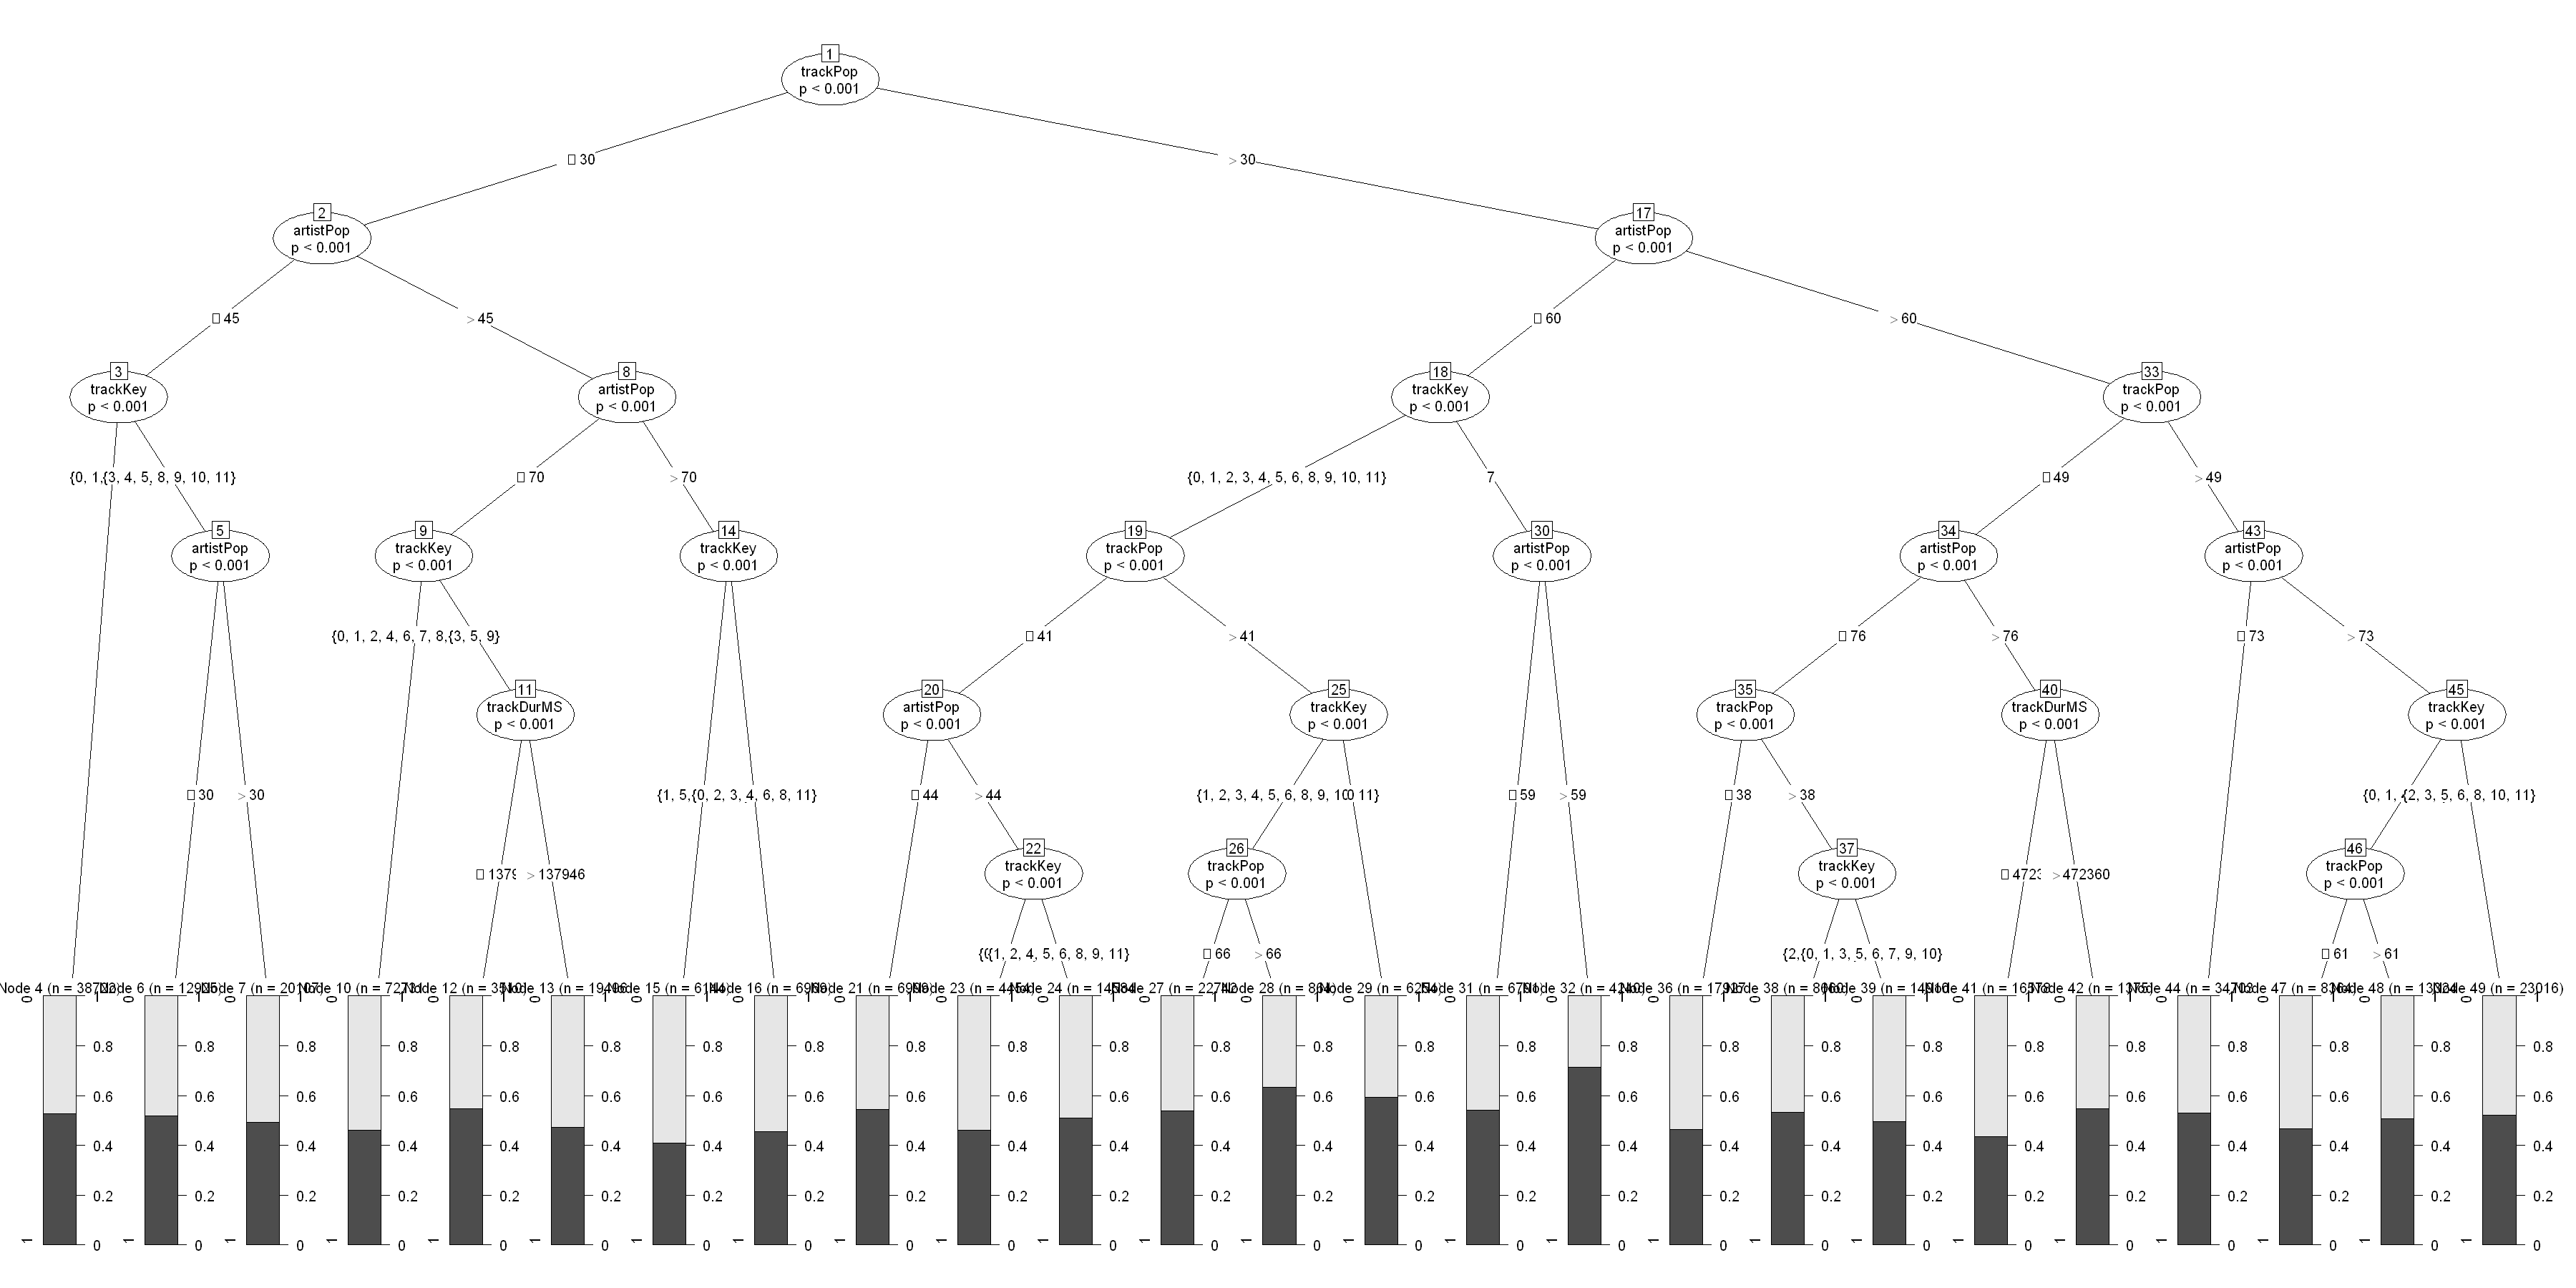

In [45]:
plot(tree1)

In [21]:
predict1 <- predict(tree1, df_test)

In [23]:
conf_matrix <- table(df_test$Preferred, predict1)
conf_matrix

   predict1
        0     1
  0 25323 23143
  1 21801 26330

In [24]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
accuracy

[1] 0.5347268

### tree 2: 

Predict preference using artist/track popularity metrics, low level track features AND year of release

In [25]:
tree2 <- ctree(Preferred ~ artistPop + trackPop + trackDurMS + trackKey + trackMode + albumYear, data=df_train, controls = ctree_control(mincriterion=0.999, minsplit=10000)) 
tree2


	 Conditional inference tree with 29 terminal nodes

Response:  Preferred 
Inputs:  artistPop, trackPop, trackDurMS, trackKey, trackMode, albumYear 
Number of observations:  386389 

1) trackPop <= 30; criterion = 1, statistic = 220.146
  2) artistPop <= 45; criterion = 1, statistic = 477.322
    3) trackKey == {0, 1, 2, 6, 7}; criterion = 1, statistic = 63.53
      4) albumYear <= 1996; criterion = 1, statistic = 19.239
        5)*  weights = 8048 
      4) albumYear > 1996
        6) artistPop <= 23; criterion = 1, statistic = 29.802
          7)*  weights = 7039 
        6) artistPop > 23
          8)*  weights = 23635 
    3) trackKey == {3, 4, 5, 8, 9, 10, 11}
      9) artistPop <= 30; criterion = 1, statistic = 21.701
        10)*  weights = 12925 
      9) artistPop > 30
        11)*  weights = 20107 
  2) artistPop > 45
    12) artistPop <= 70; criterion = 1, statistic = 30.298
      13) trackKey == {0, 1, 2, 4, 6, 7, 8, 10, 11}; criterion = 0.999, statistic = 36.621
        1

In [48]:
png("FIGURES/tree2.png", width=50, height=15, units="in", res=300)
plot(tree2)
dev.off()

png 
  2

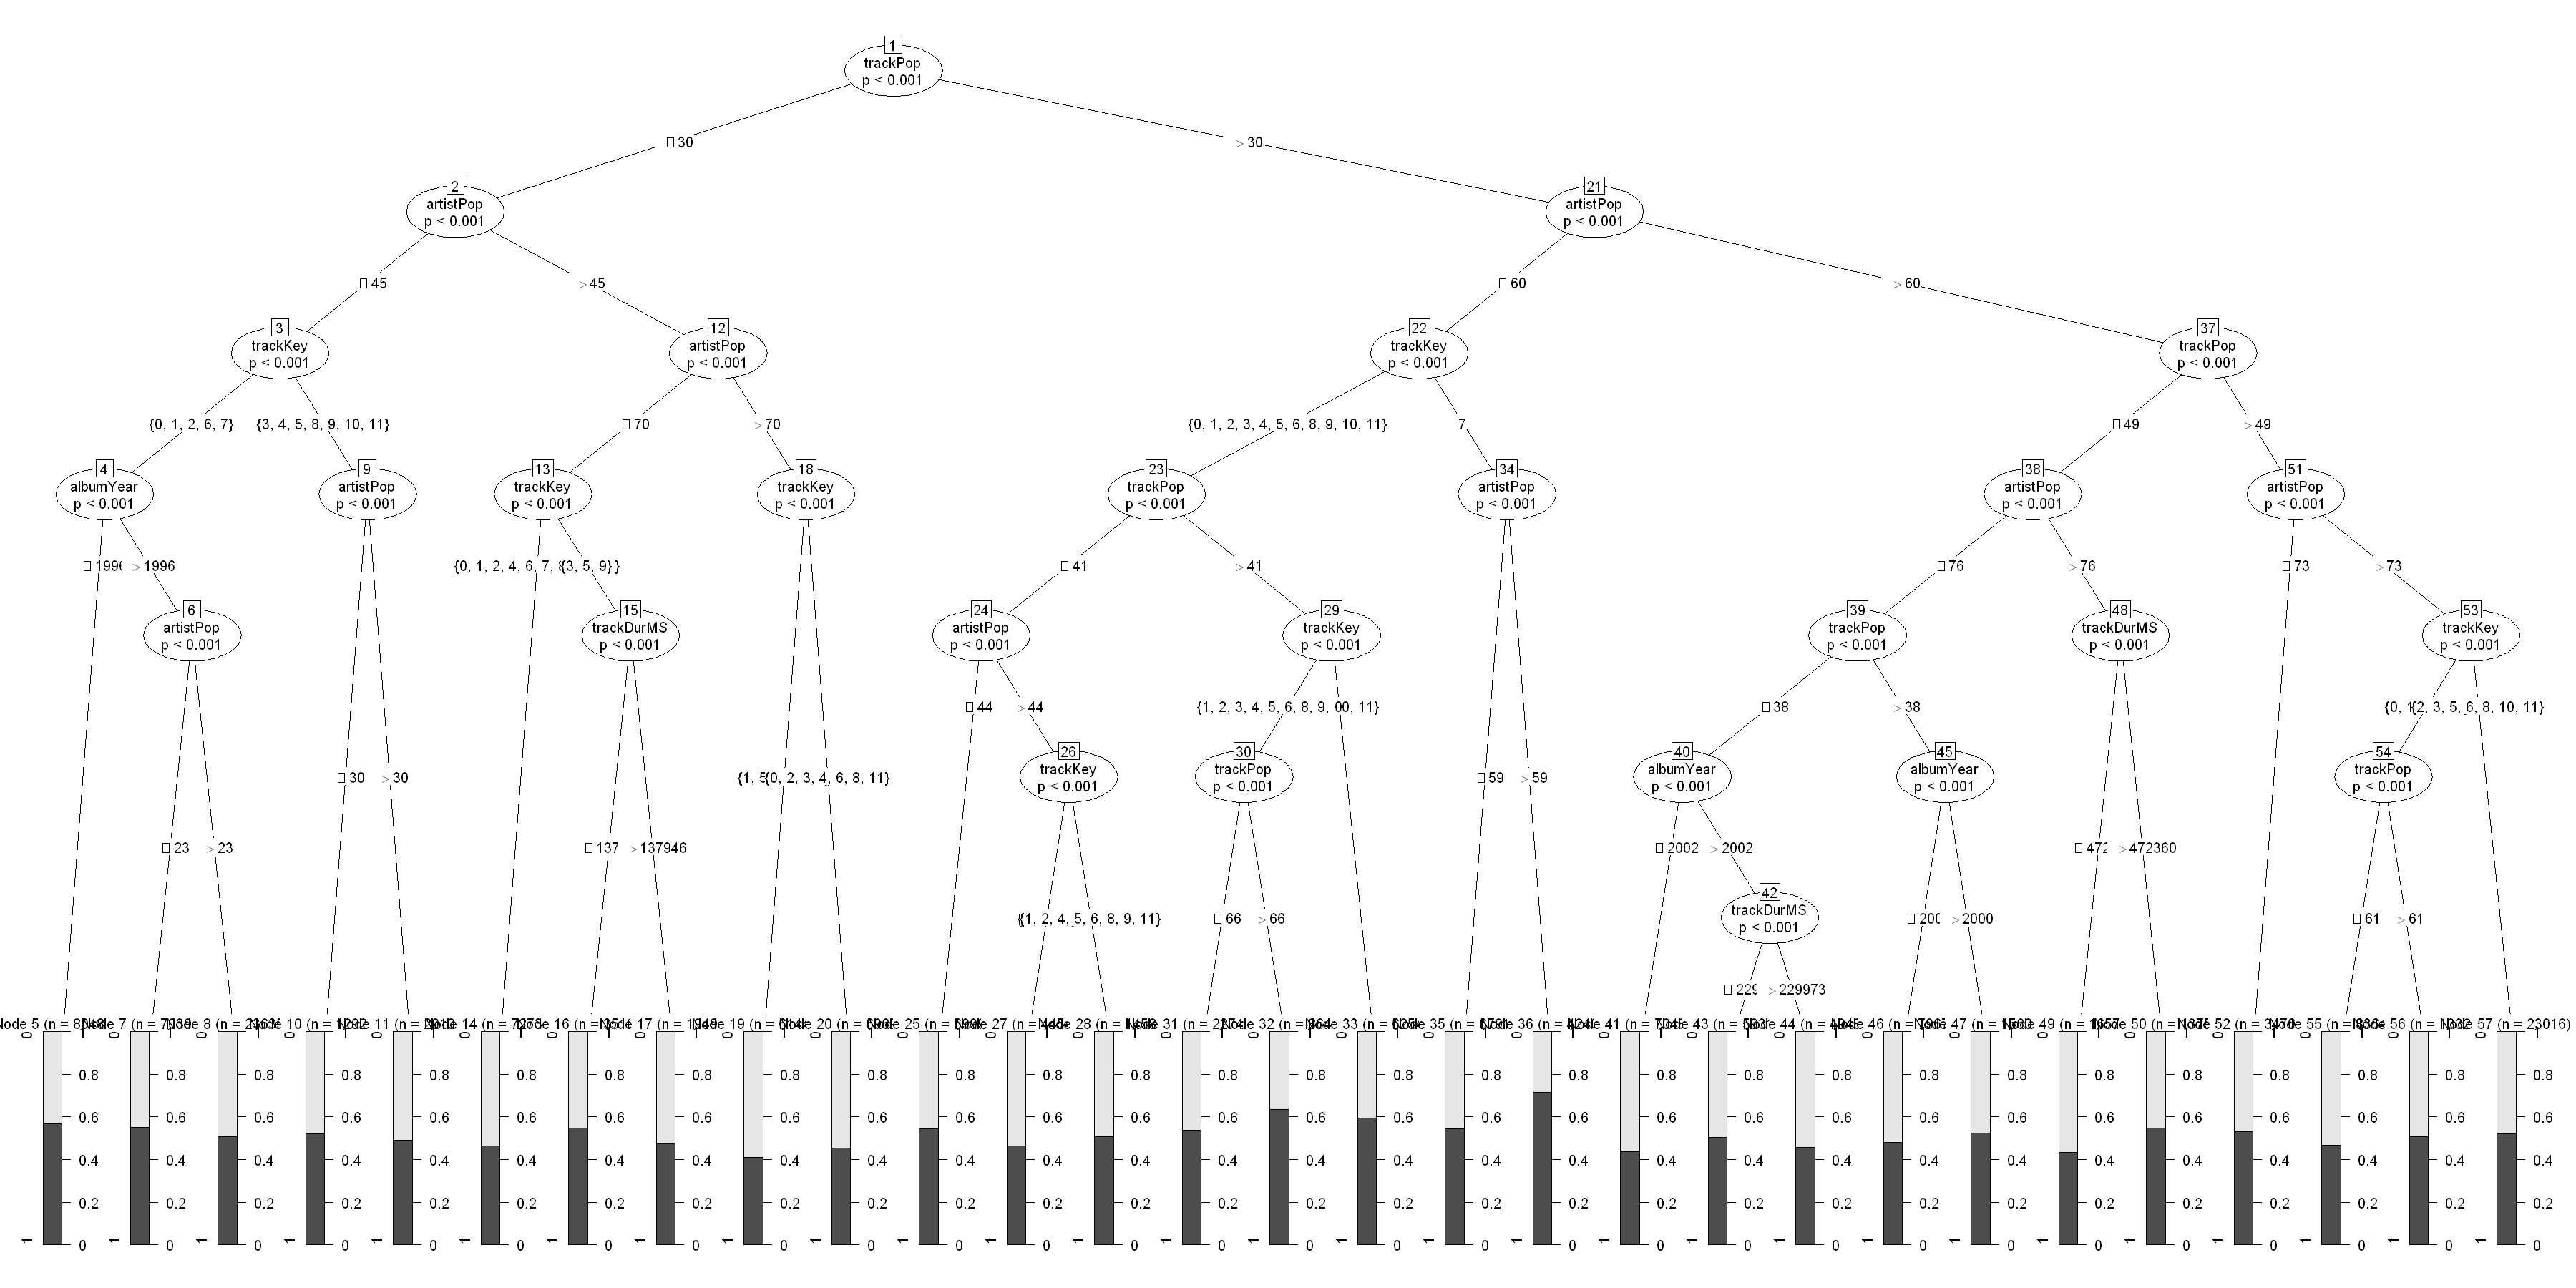

In [26]:
options(repr.plot.width=30, repr.plot.height=15)
plot(tree2)

In [51]:
predict2 <- predict(tree2, df_test)

In [52]:
conf_matrix <- table(df_test$Preferred, predict2)
conf_matrix

   predict2
        0     1
  0 23652 24814
  1 20254 27877

In [53]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
accuracy

[1] 0.5334431

### tree 3:

Predict preference using all possible attributes, including preference distance

In [30]:
tree3 <- ctree(Preferred ~ ., data=df_train, controls=ctree_control(mincriterion=0.999, minsplit=10000)) 
tree3


	 Conditional inference tree with 31 terminal nodes

Response:  Preferred 
Inputs:  artistPop, trackPop, trackDurMS, trackKey, trackMode, albumYear, pref_dist 
Number of observations:  386389 

1) pref_dist <= 0.997739; criterion = 1, statistic = 532.757
  2) pref_dist <= 0.9682379; criterion = 1, statistic = 349.807
    3) artistPop <= 45; criterion = 1, statistic = 208.172
      4) trackKey == {0, 1, 2, 7}; criterion = 1, statistic = 74.491
        5) albumYear <= 1998; criterion = 1, statistic = 24.854
          6)*  weights = 9436 
        5) albumYear > 1998
          7)*  weights = 23257 
      4) trackKey == {3, 4, 5, 6, 8, 9, 10, 11}
        8) artistPop <= 16; criterion = 0.999, statistic = 15.462
          9)*  weights = 4673 
        8) artistPop > 16
          10) trackPop <= 24; criterion = 1, statistic = 21.881
            11)*  weights = 23728 
          10) trackPop > 24
            12)*  weights = 8012 
    3) artistPop > 45
      13) trackPop <= 30; criterion = 1, st

In [50]:
png("FIGURES/tree3.png", width=50, height=15, units="in", res=300)
plot(tree3)
dev.off()

png 
  2

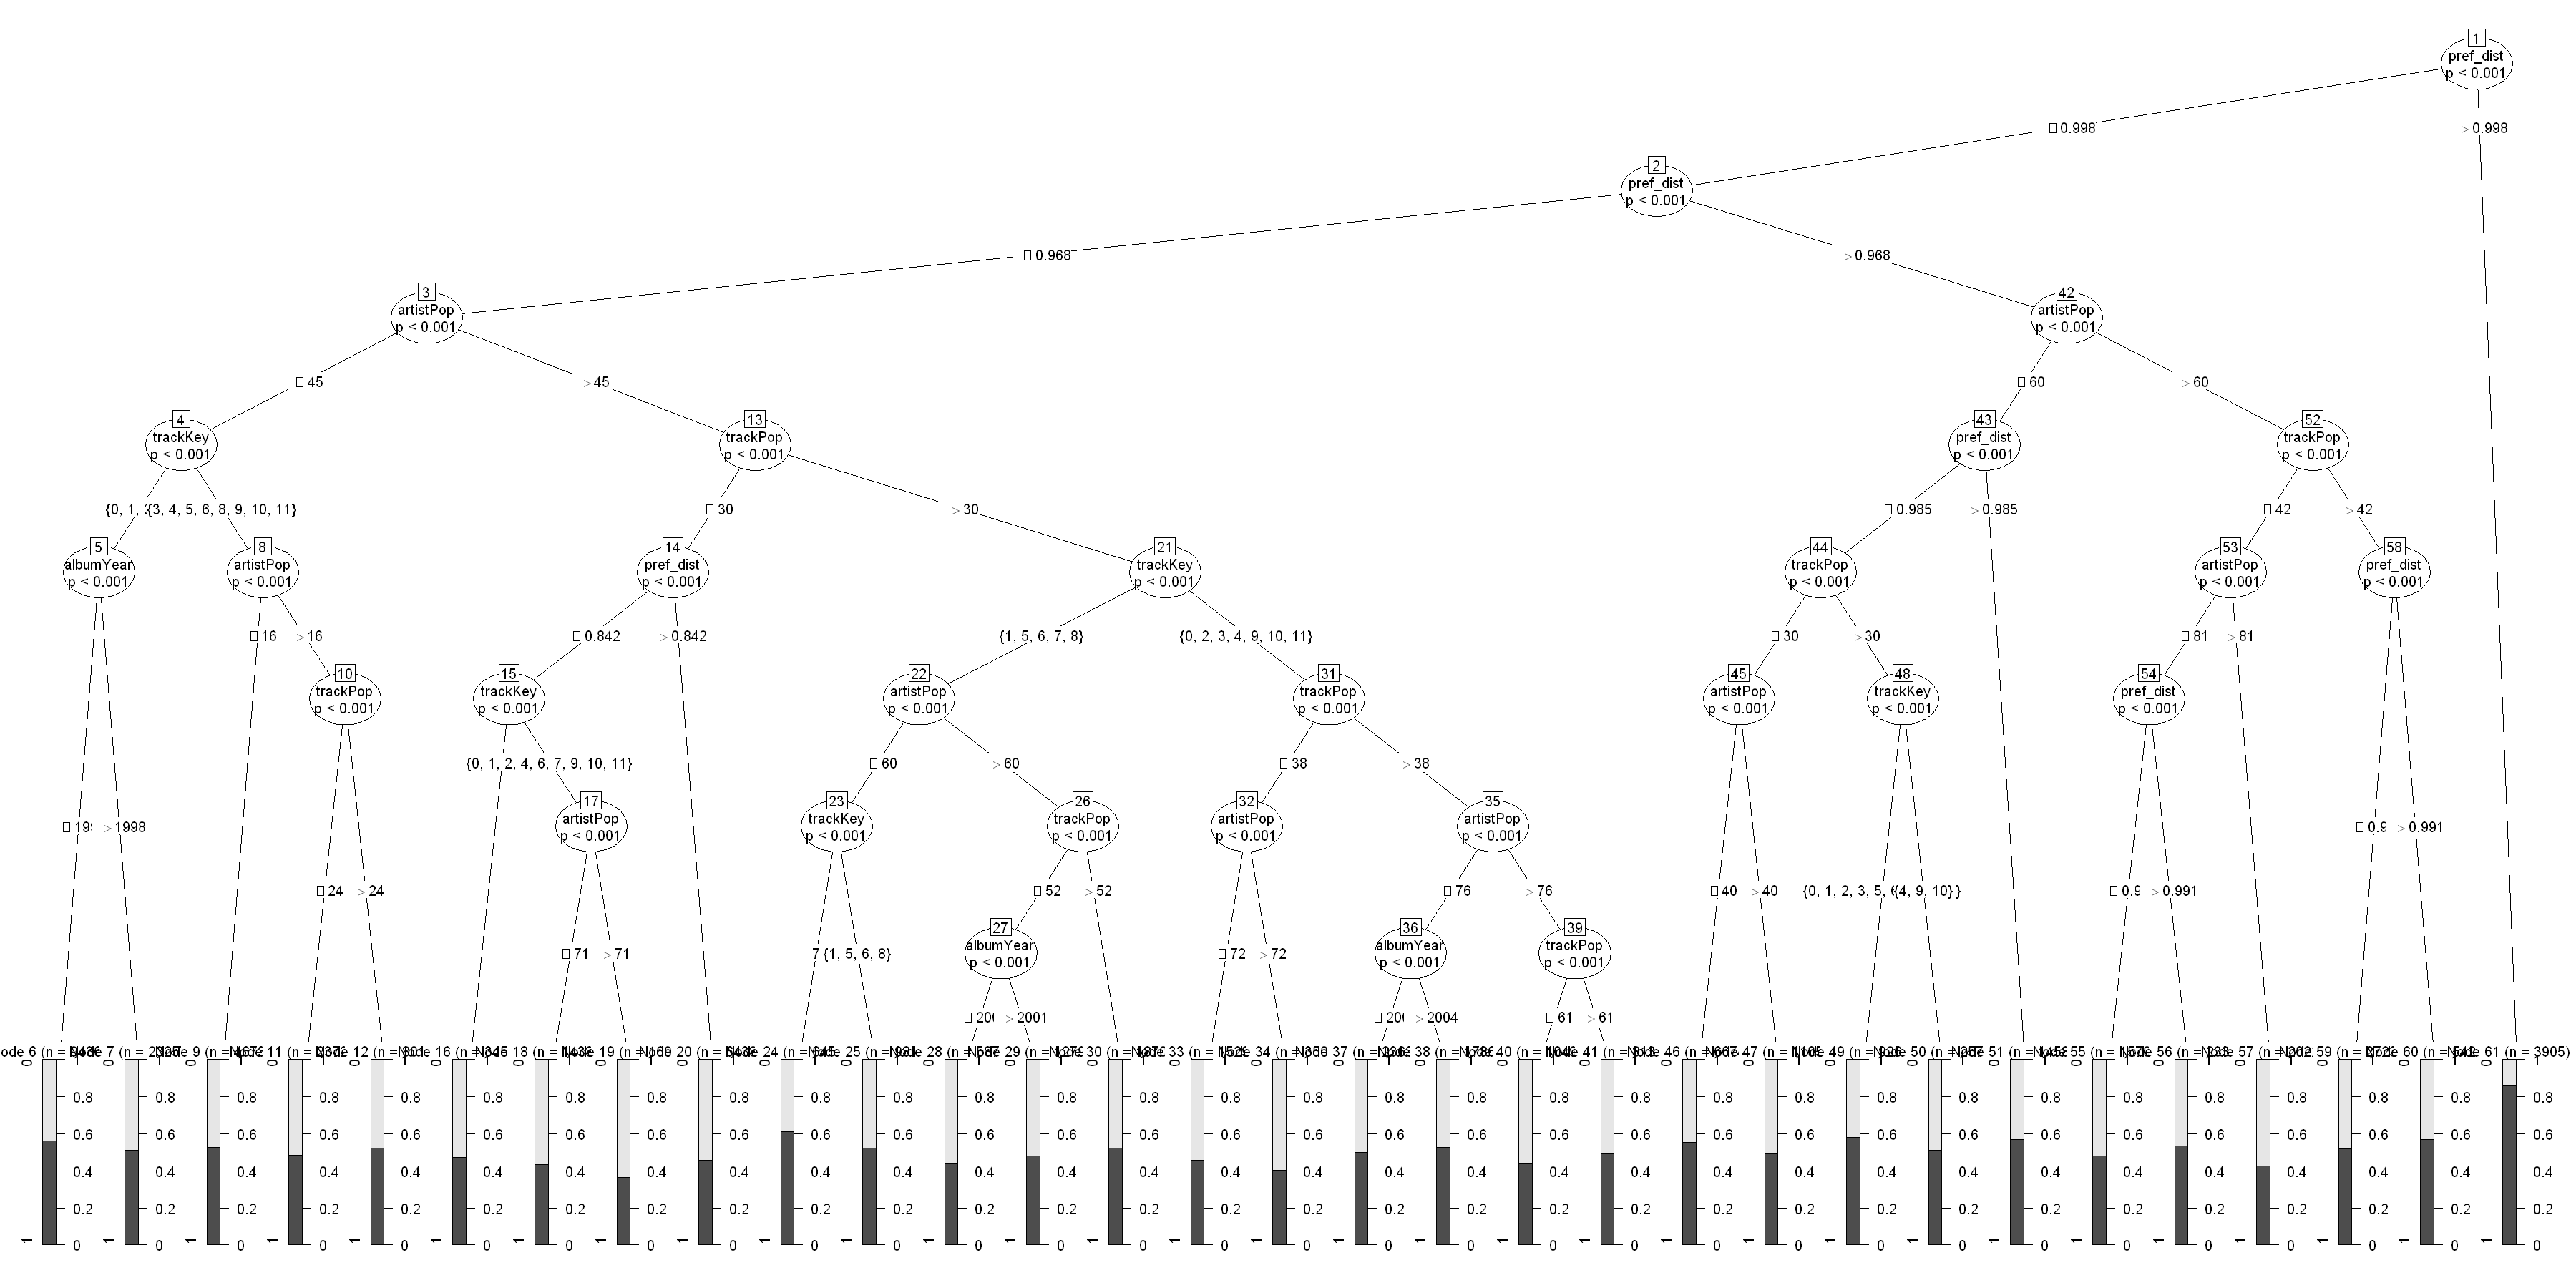

In [31]:
options(repr.plot.width=30, repr.plot.height=15)
plot(tree3)

In [32]:
predict3 <- predict(tree3, df_test)

In [33]:
conf_matrix <- table(df_test$Preferred, predict3)
conf_matrix

   predict3
        0     1
  0 29009 19457
  1 25112 23019

In [34]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)

In [35]:
accuracy

[1] 0.5386089

### tree 4:

Out of curiosity, what does the tree look like if we only use the preference dist attribute?

In [40]:
tree4 <- ctree(Preferred ~ pref_dist + artistPop + trackPop, data=df_train, controls=ctree_control(mincriterion=0.999, minsplit=10000)) 
tree4


	 Conditional inference tree with 21 terminal nodes

Response:  Preferred 
Inputs:  pref_dist, artistPop, trackPop 
Number of observations:  386389 

1) pref_dist <= 0.997739; criterion = 1, statistic = 532.757
  2) pref_dist <= 0.9682379; criterion = 1, statistic = 349.807
    3) artistPop <= 45; criterion = 1, statistic = 208.172
      4) trackPop <= 39; criterion = 1, statistic = 28.678
        5)*  weights = 65002 
      4) trackPop > 39
        6)*  weights = 4104 
    3) artistPop > 45
      7) trackPop <= 30; criterion = 1, statistic = 378.444
        8) pref_dist <= 0.8415107; criterion = 1, statistic = 25.626
          9) artistPop <= 71; criterion = 0.999, statistic = 13.791
            10)*  weights = 17582 
          9) artistPop > 71
            11)*  weights = 1957 
        8) pref_dist > 0.8415107
          12)*  weights = 64383 
      7) trackPop > 30
        13) artistPop <= 73; criterion = 1, statistic = 152.75
          14) pref_dist <= 0.8831433; criterion = 1, sta

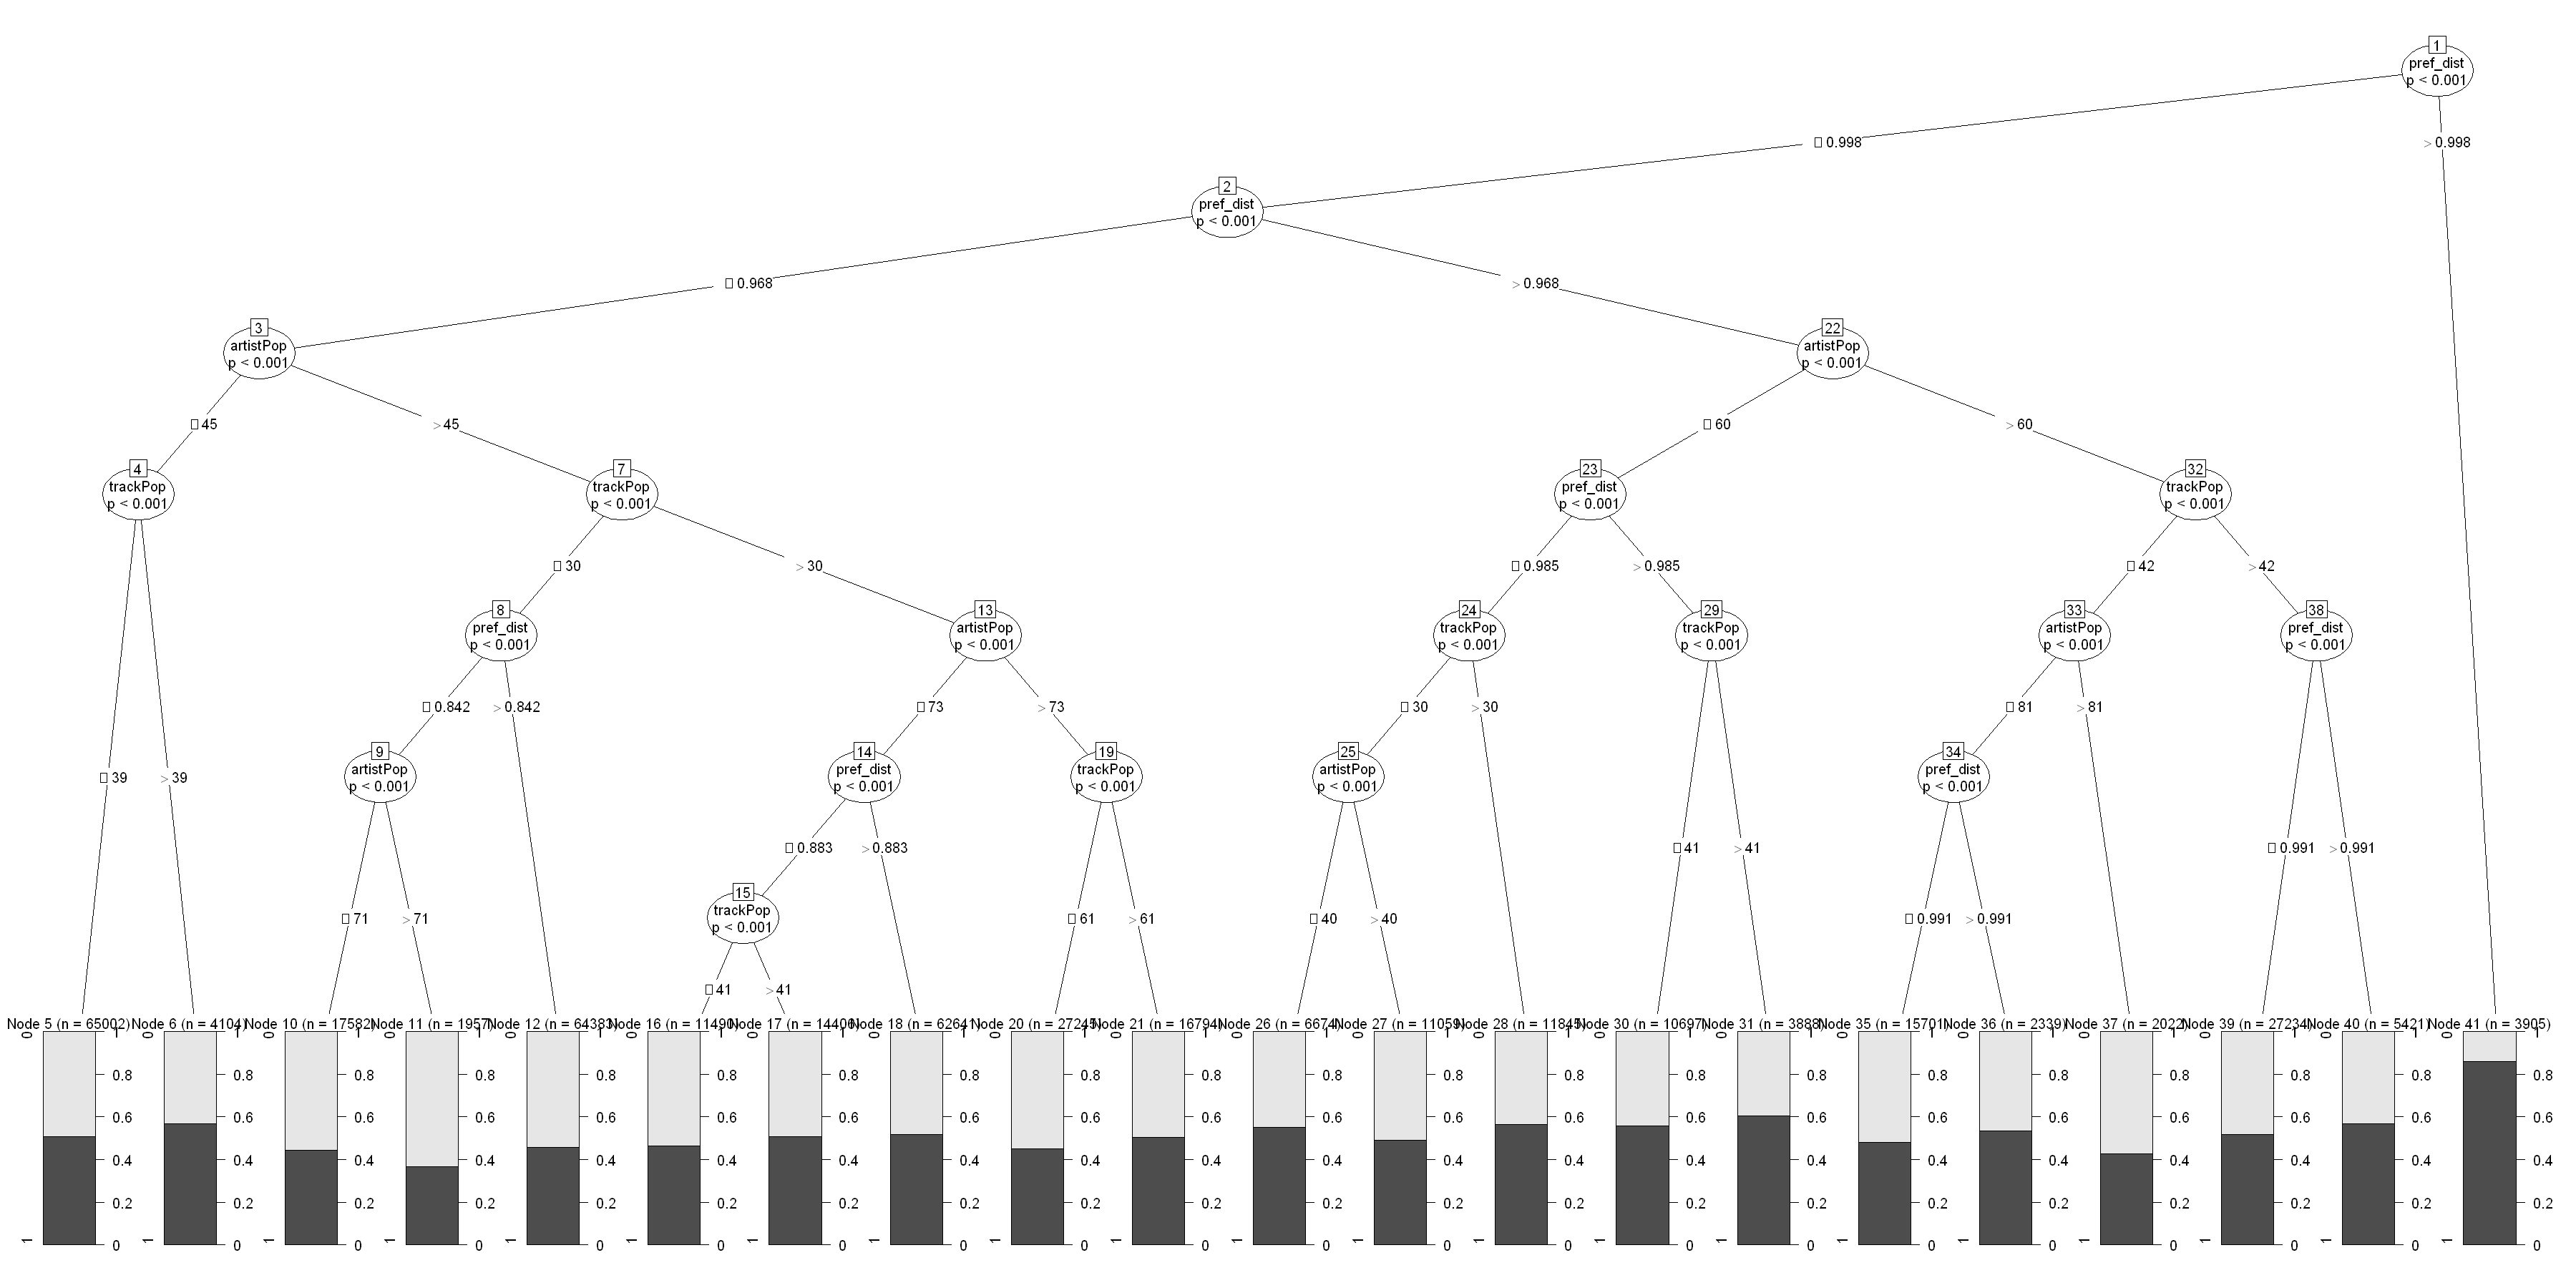

In [41]:
options(repr.plot.width=30, repr.plot.height=15)
plot(tree4)

In [42]:
predict4 <- predict(tree4, df_test)
conf_matrix <- table(df_test$Preferred, predict4)
conf_matrix

   predict4
        0     1
  0 20733 27733
  1 17307 30824

In [43]:
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
accuracy

[1] 0.5337329